# Importing required libraries
Importing the required libraries which we will be using throughout our training pipeline

In [2]:
import os
import glob
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'pandas'

In [4]:
!gdown https://drive.google.com/file/d/1uUoGlvHXuzsKtNbxifjKr8YfwnQzZnRv/view?usp=sharing --fuzzy

zsh:1: no matches found: https://drive.google.com/file/d/1uUoGlvHXuzsKtNbxifjKr8YfwnQzZnRv/view?usp=sharing


Unzipping our downloaded data

In [5]:
!unzip /content/ninjacart_data.zip

unzip:  cannot find or open /content/ninjacart_data.zip, /content/ninjacart_data.zip.zip or /content/ninjacart_data.zip.ZIP.



We can visualize from the data directory, the data is divided into train/test folders,
<br>consisting of four subfolders containing images of :
 - Indian market
 - Onion
 - Potato
 - Tomato
 <br>

## Visualizing our Images
<h3> Now let's plot some random images from our Dataset from each class !

<ipython-input-4-bb3683258442>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, n)


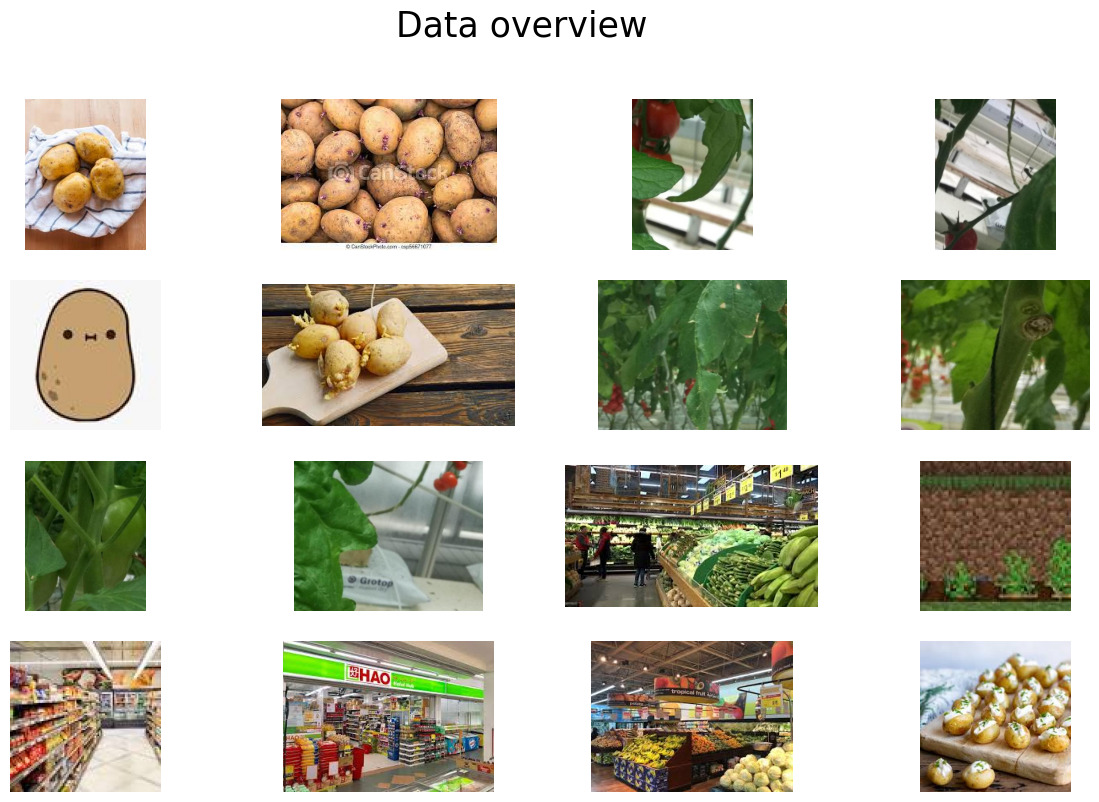

In [4]:
train_folder = '/content/ninjacart_data/train'

images = []
for folder in os.listdir(train_folder):
  for image in os.listdir(train_folder + '/' + folder):
    images.append(os.path.join(train_folder, folder, image))

fig = plt.figure(1, figsize=(15, 9))
fig.suptitle('Data overview', fontsize=25)
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = tf.keras.utils.load_img(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

- We write a code snippet to fetch the paths of all images for every class in our train and test set in root folder, which we will use later to test our model on random samples.

- The image arrays and count for every class are stored in a dictionary to plot its distribution

In [5]:
class_dirs = os.listdir("/content/ninjacart_data/train") # list all directories inside "train" folder
image_dict = {} # dict to store image array(value) for every class(key)
count_dict = {} # dict to store count of files(value) for every class(key)

# iterate over all class_dirs
for cls in class_dirs:
    # get list of all paths inside the subdirectory
    file_paths = glob.glob(f'/content/ninjacart_data/train/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select random item from list of image paths
    image_path = random.choice(file_paths)
    # load image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

<h4>Store image arrays and count for each class in test data :

In [6]:
class_dirs_test = os.listdir("/content/ninjacart_data/test") # list all directories inside "test" folder
image_dict_test = {} # dict to store image array(value) for every class(key)
count_dict_test = {} # dict to store count of files(value) for every class(key)

# iterate over all class_dirs
for cls in class_dirs_test:
    # get list of all paths inside the subdirectory
    file_paths_test = glob.glob(f'/content/ninjacart_data/test/{cls}/*')
    # count number of files in each class and add it to count_dict
    count_dict_test[cls] = len(file_paths_test)
    # select random item from list of image paths
    image_path = random.choice(file_paths_test)
    # load image using keras utility function and save it in image_dict
    image_dict_test[cls] = tf.keras.utils.load_img(image_path)



<h4>Plot a Grid of training samples from each class to display their dimensions

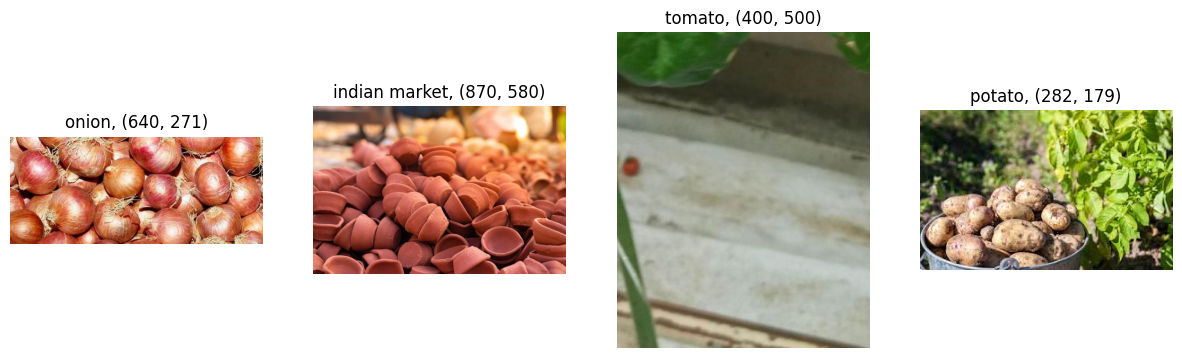

In [7]:
# Visualize Random Sample from each class

plt.figure(figsize=(15, 7))
# iterate over dictionary items (class label, image array)
for i, (cls,img) in enumerate(image_dict.items()):
    # create a subplot axis
    ax = plt.subplot(1, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set "class name" along with "image size" as title
    plt.title(f'{cls}, {img.size}')
    plt.axis("off")

Dataset consists of uneven sized images


- Every image needs to be labelled according to its class and converted to a tensor.
- We will split our data into 3 sets : Train, Test and Validation

For this task, we will use `tf.keras.utils.image_dataset_from_directory`, which will :

- Create an **(image, label)** pair for every image and label the images using one-hot encoding (alphabetically)

- Batching (Grouping) images together according to *batch_size*
- Resize the Images to the shape ***(256, 256)***
- Seed the shuffling of our images, so that it shuffles in a 'fixed' way
- Splitting 20% of our training data for validation

In [8]:
train_dir = '/content/ninjacart_data/train'
test_dir = '/content/ninjacart_data/test'

In [9]:
# Specifying the image size to resize all images
image_size = (256, 256)

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = image_size,
                                                       seed = 2024,
                                                       validation_split = 0.2,
                                                       subset = "training",
                                                       shuffle=True)

Found 3135 files belonging to 4 classes.
Using 2508 files for training.


In [11]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [12]:
test_ds = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = image_size,
                                                       seed = 2024,
                                                      )

Found 351 files belonging to 4 classes.


Specifying our Validation data, which we took from our train_ds specifying `validation_split = 0.2`

We take the last 20% data from our train_ds, we use the same seed as train_ds

In [13]:
valid_ds = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                       label_mode = 'categorical',
                                                       batch_size = 32,
                                                       image_size = image_size,
                                                       seed = 2024,
                                                       validation_split = 0.2,
                                                       subset = "validation")

Found 3135 files belonging to 4 classes.
Using 627 files for validation.


Since `label_mode = 'categorical'` one-hot encodes the classes **alphabetically**,
<br>*indian market* (which we consider noise) = class 1 and *tomato* = class 4

In [14]:
# index           0        1        2         3
class_names = ['noise', 'onion', 'potato', 'tomato']

# **ResNet Model**

ResNet performance on ImageNet Dataset

In [15]:
# load base model
base_model_1 = tf.keras.applications.resnet50.ResNet50(input_shape=(256, 256, 3), include_top = False)

In [16]:
# append classification layer
model_1 = base_model_1.output

model_1 = tf.keras.Sequential([
            #Normalizing 0-255 into 0 to 1
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1], 3]),
            base_model_1,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(4, activation = 'softmax')
        ])

In [17]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [18]:
history_1 = model_1.fit(train_ds, validation_data = valid_ds, epochs = 30)

Epoch 1/30
79/79 [==============================] - 83s 531ms/step - loss: 2.4993 - accuracy: 0.4211 - precision: 0.5341 - recall: 0.1156 - val_loss: 600899456.0000 - val_accuracy: 0.2727 - val_precision: 0.2727 - val_recall: 0.2727
Epoch 2/30
79/79 [==============================] - 35s 437ms/step - loss: 1.3610 - accuracy: 0.5865 - precision: 0.6373 - recall: 0.2045 - val_loss: 16.1886 - val_accuracy: 0.2711 - val_precision: 0.2711 - val_recall: 0.2711
Epoch 3/30
79/79 [==============================] - 37s 456ms/step - loss: 0.9351 - accuracy: 0.6810 - precision: 0.7683 - recall: 0.5275 - val_loss: 5.4036 - val_accuracy: 0.2727 - val_precision: 0.2727 - val_recall: 0.2727
Epoch 4/30
79/79 [==============================] - 38s 467ms/step - loss: 0.7187 - accuracy: 0.7636 - precision: 0.8153 - recall: 0.6810 - val_loss: 8.2327 - val_accuracy: 0.2281 - val_precision: 0.2281 - val_recall: 0.2281
Epoch 5/30
79/79 [==============================] - 37s 454ms/step - loss: 0.6406 - accurac

## Evaluating ResNet

In [26]:
def plot_acc_loss(model_history, n_epochs):

  fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
  ax = axes.ravel()

  #accuracy graph
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['accuracy']], label='Train', color='b')
  ax[0].plot(range(0, n_epochs), [acc * 100 for acc in model_history.history['val_accuracy']], label='Val', color='r')
  ax[0].set_title('Accuracy vs. epoch', fontsize=15)
  ax[0].set_ylabel('Accuracy', fontsize=15)
  ax[0].set_xlabel('epoch', fontsize=15)
  ax[0].legend()

  #loss graph
  ax[1].plot(range(0, n_epochs), model_history.history['loss'], label='Train', color='b')
  ax[1].plot(range(0, n_epochs), model_history.history['val_loss'], label='Val', color='r')
  ax[1].set_title('Loss vs. epoch', fontsize=15)
  ax[1].set_ylabel('Loss', fontsize=15)
  ax[1].set_xlabel('epoch', fontsize=15)
  ax[1].legend()

  #display the graph
  plt.show()

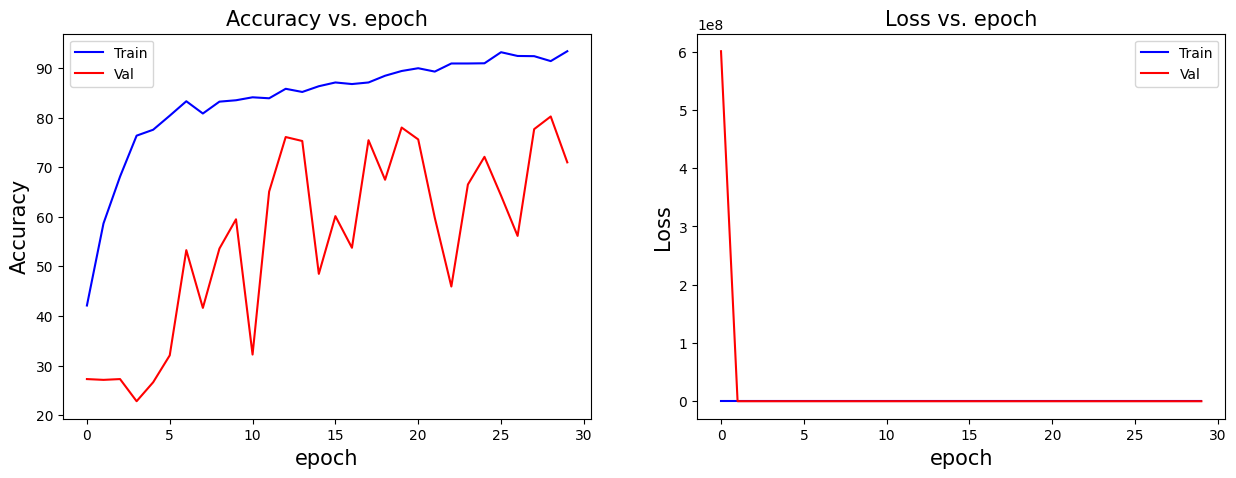

In [27]:
plot_acc_loss(history_1, n_epochs = 30)

## Model Tuning - 10 points



### Augmenting our Data
- Data Augmentation introduces our model to different aspects and visualizaitons of class images, therefore increasing model generalization
- We apply 3 types of augmentation on our training dataset
  - `RandomFlip` : randomly flips images horizontally and vertically during training

  - `RandomRotation` : randomly rotates images during training by a factor

  - `RandomTranslation` : randomly translates images during training by a shift factor

In [28]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(height_factor = 0.2, width_factor=0.2)
])

aug_ds = train_ds

for image, label in aug_ds :
  image = augmentation(image)

### Adding BatchNormalization and Dropout
We add `Dropout()` and `BatchNormalization()` to our model architecture, which will help in improving its generalization
<br><br>
How do they help ?
- `Dropout()` : Drops out random neurons while training which forces the model to focus on every feature for prediction

- `BatchNormalization()` : Normalizes the inputs from previous layer for every mini-batch before sending it to the next layer.
<br>Help in mantaining the distribution of our data by making it a normal distribution (mean = 0, std. = 1)

In [29]:

model_2 = tf.keras.Sequential([
            #Normalizing 0-255 into 0 to 1
            tf.keras.layers.Rescaling(1./255),
            tf.keras.layers.InputLayer(input_shape=[image_size[0], image_size[1], 3]),
            base_model_1,
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(rate = 0.1),
            tf.keras.layers.Dense(4, activation = 'softmax')
        ])

In [30]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5, restore_best_weights=True
)

In [31]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-2),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy', 'Precision', 'Recall'])

In [32]:
history_2 = model_2.fit(aug_ds, validation_data = valid_ds, epochs = 30, callbacks= early_stopping_cb)

Epoch 1/30
79/79 [==============================] - 68s 473ms/step - loss: 1.3108 - accuracy: 0.7779 - precision: 0.8055 - recall: 0.7512 - val_loss: 97445.6562 - val_accuracy: 0.4976 - val_precision: 0.5050 - val_recall: 0.4864
Epoch 2/30
79/79 [==============================] - 36s 442ms/step - loss: 0.8708 - accuracy: 0.8345 - precision: 0.8473 - recall: 0.8210 - val_loss: 4588.3364 - val_accuracy: 0.5279 - val_precision: 0.5485 - val_recall: 0.5231
Epoch 3/30
79/79 [==============================] - 35s 438ms/step - loss: 0.8711 - accuracy: 0.8238 - precision: 0.8329 - recall: 0.8146 - val_loss: 4252.9966 - val_accuracy: 0.5598 - val_precision: 0.5663 - val_recall: 0.5518
Epoch 4/30
79/79 [==============================] - 36s 438ms/step - loss: 0.7072 - accuracy: 0.8509 - precision: 0.8615 - recall: 0.8457 - val_loss: 1.2195 - val_accuracy: 0.4928 - val_precision: 0.5125 - val_recall: 0.4593
Epoch 5/30
79/79 [==============================] - 35s 437ms/step - loss: 0.8216 - accura

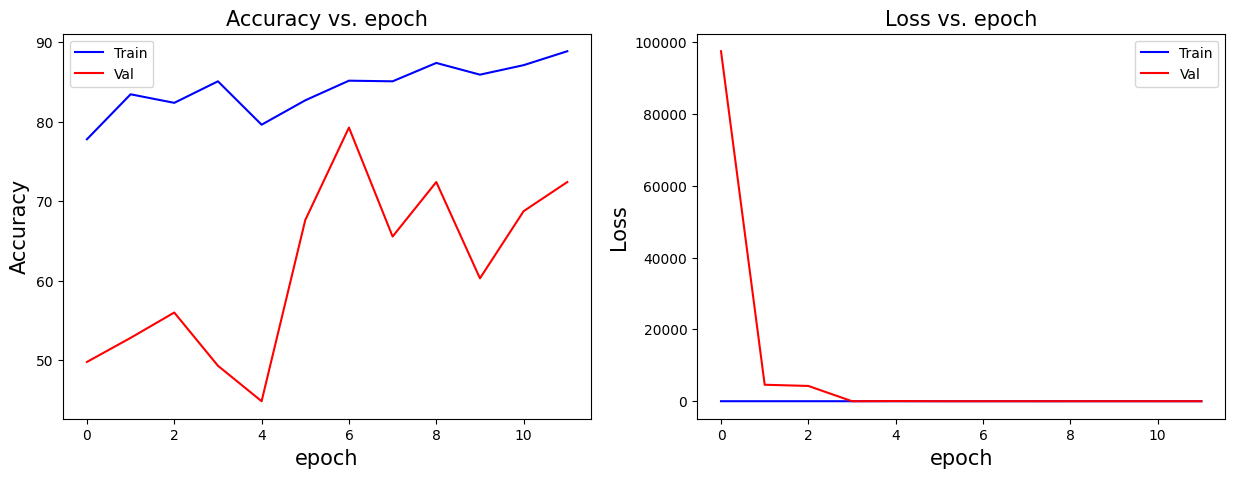

In [33]:
plot_acc_loss(history_2, n_epochs = len(history_2.history['accuracy']))

In [34]:
result_1 = model_1.evaluate(test_ds)
dict(zip(model_1.metrics_names, result_1))

11/11 [==============================] - 5s 364ms/step - loss: 7.9082 - accuracy: 0.6325 - precision: 0.6801 - recall: 0.5755


{'loss': 7.908195495605469,
 'accuracy': 0.632478654384613,
 'precision': 0.680134654045105,
 'recall': 0.5754985809326172}

We achieved a test accuracy of **63%** on our ResNet Model
Loss of **7.9**




## Testing the model

We list all the files in our test directory and append their complete paths to a list *test_images* which we will use to test our model by predicting on on random unseen data



In [35]:
result_2 = model_2.evaluate(test_ds)
dict(zip(model_2.metrics_names, result_2))

11/11 [==============================] - 2s 124ms/step - loss: 2.9061 - accuracy: 0.8234 - precision: 0.8514 - recall: 0.7835


{'loss': 2.9060840606689453,
 'accuracy': 0.8233618140220642,
 'precision': 0.8513931632041931,
 'recall': 0.7834757566452026}

We achieved a test accuracy of **82%** on our ResNet Model
Loss of **2.9**

### Evaluating accuracy on each class
 First we specify paths of each of our test classes

- We define a function `classwise_accuracy` which calculates accuracy for each class by taking in class path and model,
- We append all the file paths for the input class in a list
-  from which we predict on all images and check if the label and predicted label are equal,<br>
according to which we calculate the accuracy of our model on the input class

In [36]:
noise_path = '/content/ninjacart_data/test/indian market'
onion_path = '/content/ninjacart_data/test/onion'
potato_path = '/content/ninjacart_data/test/potato'
tomato_path = '/content/ninjacart_data/test/tomato'

In [37]:
def classwise_accuracy(class_path, class_name, model_name) :
    paths = []
    for i in os.listdir(class_path):
        paths.append(class_path + "/" + str(i))

    correct = 0
    total = 0

    for i in range(len(paths)):
        total+= 1

        img = tf.keras.utils.load_img(paths[i])
        img = tf.keras.utils.img_to_array(img)
        img = tf.image.resize(img, (256, 256))
        img = tf.expand_dims(img, axis = 0)

        pred = model_name.predict(img)
        if tf.argmax(pred[0]) == class_names.index(f"{class_name}"):
            correct+= 1

    print(f"Accuracy for class {class_name} is {round((correct/total)*100, 2)}% consisting of {len(paths)} images")

In [38]:
classwise_accuracy(noise_path, 'noise', model_1)
classwise_accuracy(onion_path, 'onion', model_1)
classwise_accuracy(potato_path, 'potato', model_1)
classwise_accuracy(tomato_path, 'tomato', model_1)

1/1 [==============================] - 0s 32ms/step
Accuracy for class noise is 48.15% consisting of 81 images
1/1 [==============================] - 0s 23ms/step
Accuracy for class onion is 36.14% consisting of 83 images
1/1 [==============================] - 0s 24ms/step
Accuracy for class potato is 56.79% consisting of 81 images
1/1 [==============================] - 0s 22ms/step
Accuracy for class tomato is 100.0% consisting of 106 images


In [39]:
classwise_accuracy(noise_path, 'noise', model_2)
classwise_accuracy(onion_path, 'onion', model_2)
classwise_accuracy(potato_path, 'potato', model_2)
classwise_accuracy(tomato_path, 'tomato', model_2)

1/1 [==============================] - 0s 22ms/step
Accuracy for class noise is 79.01% consisting of 81 images
1/1 [==============================] - 0s 24ms/step
Accuracy for class onion is 86.75% consisting of 83 images
1/1 [==============================] - 0s 34ms/step
Accuracy for class potato is 61.73% consisting of 81 images
1/1 [==============================] - 0s 40ms/step
Accuracy for class tomato is 97.17% consisting of 106 images
